<a href="https://colab.research.google.com/github/VolkhinD/cancer/blob/main/Whole_Basic_Classifier_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Begginning

In [69]:
path = '/content/drive/MyDrive/Data/cancer_data.csv'

data = pd.read_csv(path)
y = data.diagnosis

features = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
data.pop('diagnosis')
data.pop('Unnamed: 32')
y = y.map(lambda p: 1 if p == 'M' else 0)
data = data.set_index('id')




'Diagnosis' is the column which we are going to predict , which says if the cancer is M = malignant or B = benign. 1 means the cancer is malignant and 0 means benign.

In [70]:
# data a liitle unbalanced but it's OK
y.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [71]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Cluster Analysis

In [72]:
from sklearn.cluster import KMeans

In [73]:
scale = StandardScaler()
scaled_data = scale.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)

In [76]:
%%capture
k_model = KMeans(n_clusters = 2, random_state=1)
k_model.fit(scaled_data)
K = range(2, 15)
dist = []
for k in K:
  model = KMeans(n_clusters = k, random_state=1).fit(scaled_data)
  dist.append(model.inertia_)


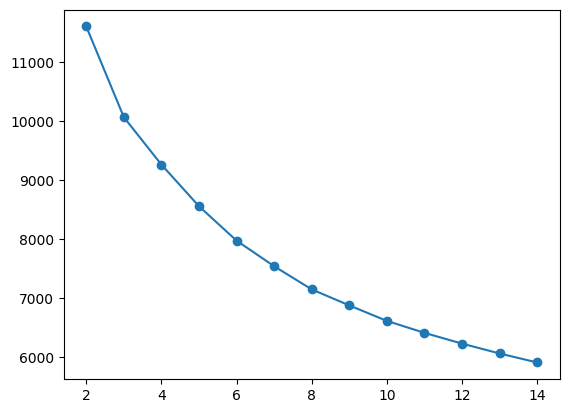

In [77]:
plt.plot(K, dist, marker='o')
plt.show()

It seems sharp change in cluster 3

In [79]:
k_model = KMeans(n_clusters = 3, random_state=1)
k_model.fit(scaled_data)
scaled_data['cluster_3'] = k_model.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Scatter Matrix

array([[<Axes: xlabel='radius_mean', ylabel='radius_mean'>,
        <Axes: xlabel='texture_mean', ylabel='radius_mean'>,
        <Axes: xlabel='perimeter_mean', ylabel='radius_mean'>,
        <Axes: xlabel='area_mean', ylabel='radius_mean'>,
        <Axes: xlabel='smoothness_mean', ylabel='radius_mean'>],
       [<Axes: xlabel='radius_mean', ylabel='texture_mean'>,
        <Axes: xlabel='texture_mean', ylabel='texture_mean'>,
        <Axes: xlabel='perimeter_mean', ylabel='texture_mean'>,
        <Axes: xlabel='area_mean', ylabel='texture_mean'>,
        <Axes: xlabel='smoothness_mean', ylabel='texture_mean'>],
       [<Axes: xlabel='radius_mean', ylabel='perimeter_mean'>,
        <Axes: xlabel='texture_mean', ylabel='perimeter_mean'>,
        <Axes: xlabel='perimeter_mean', ylabel='perimeter_mean'>,
        <Axes: xlabel='area_mean', ylabel='perimeter_mean'>,
        <Axes: xlabel='smoothness_mean', ylabel='perimeter_mean'>],
       [<Axes: xlabel='radius_mean', ylabel='area_mean'>,
 

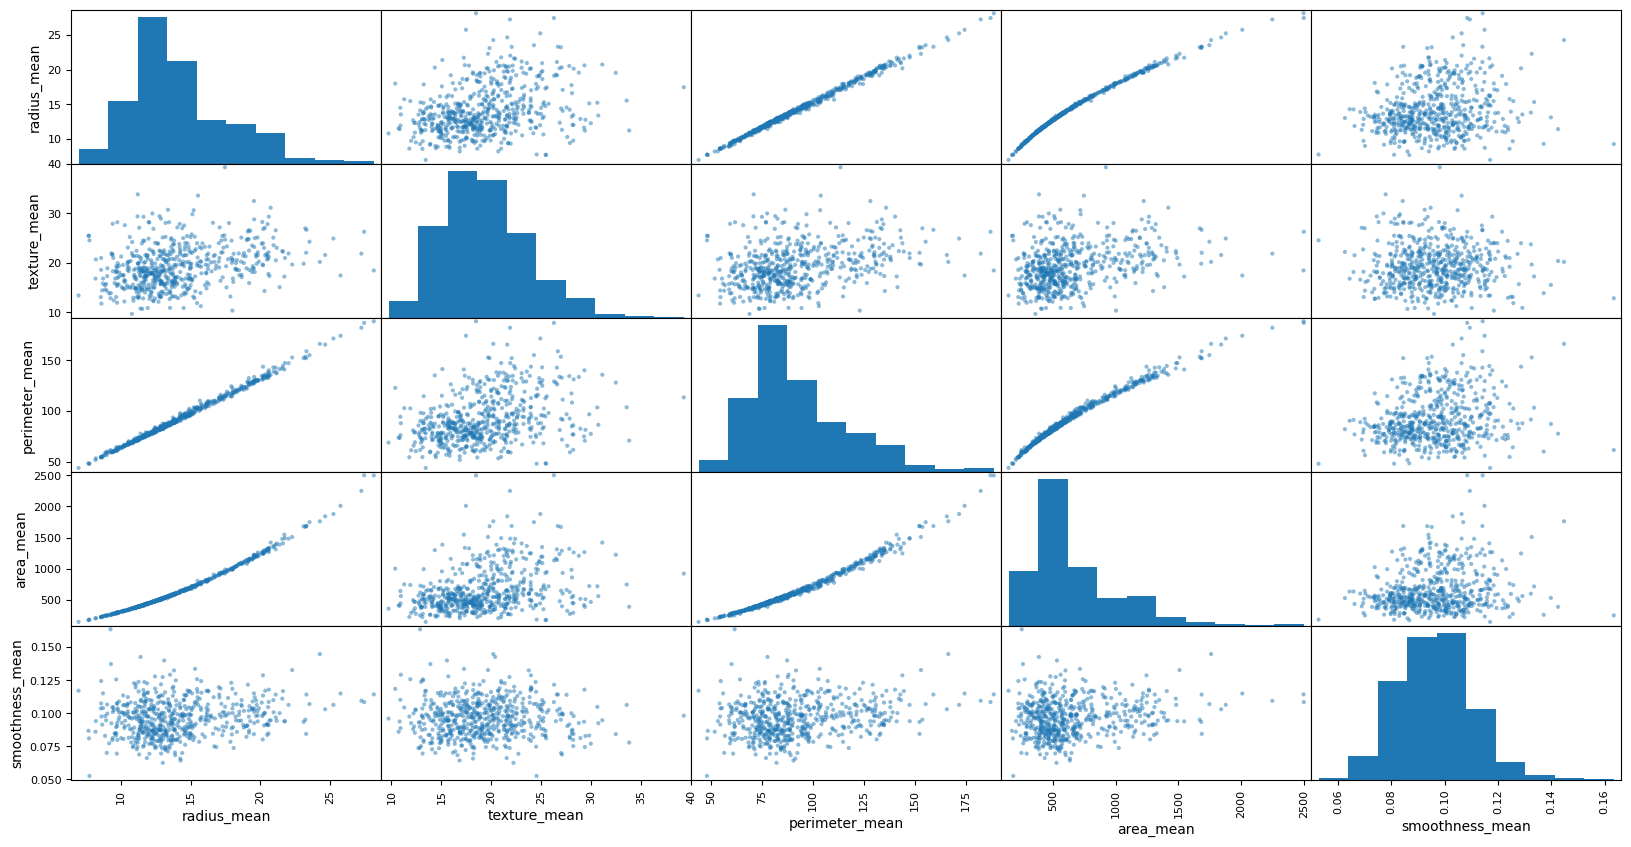

In [82]:
pd.plotting.scatter_matrix(data.iloc[:, :5], figsize=(20, 10))

Even not seeing whole scatter Matrix, it's obviouse:
>> 1. Some feateres have strong correlation
>> 2. Almooust all featurese not normal, so log or Box Coc Transformation
>> should be added to preprocessing

<Axes: ylabel='Density'>

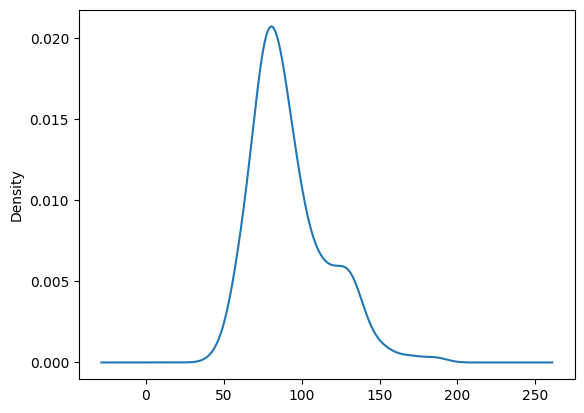

In [88]:
data.perimeter_mean.plot.kde()

# Principal Components Analisis


In [86]:
pca = PCA(n_components=2)

pca.fit(scaled_data)

X_pca = pca.transform(scaled_data)

X_pca_df = pd.DataFrame(X_pca)


print("Data shape before scale "+ str(data.shape))
print("Data shape after PCA " + str(X_pca.shape))

Data shape before scale (569, 31)
Data shape after PCA (569, 2)


<Axes: xlabel='1', ylabel='0'>

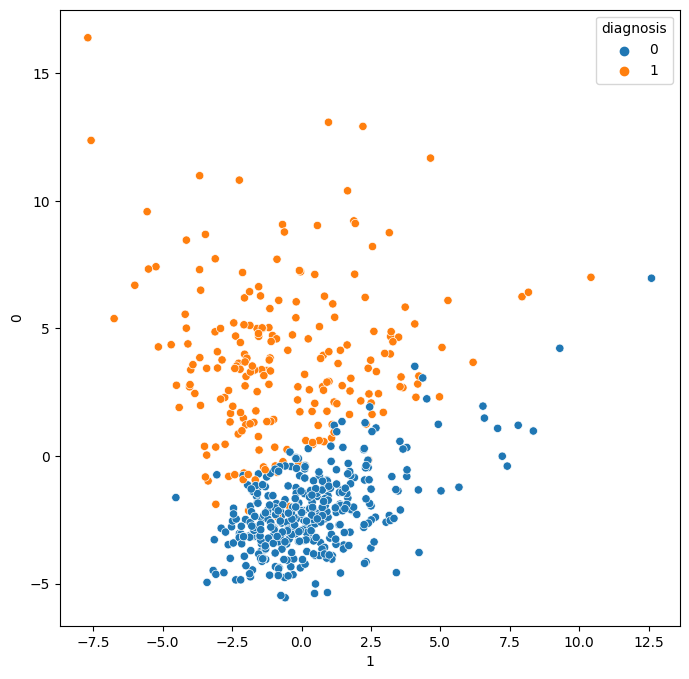

In [89]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=X_pca_df[1], y=X_pca_df[0], hue=y)

PCA devide data pretty well

# Correlation Matrix

In [102]:
data.shape

(569, 30)

<Axes: >

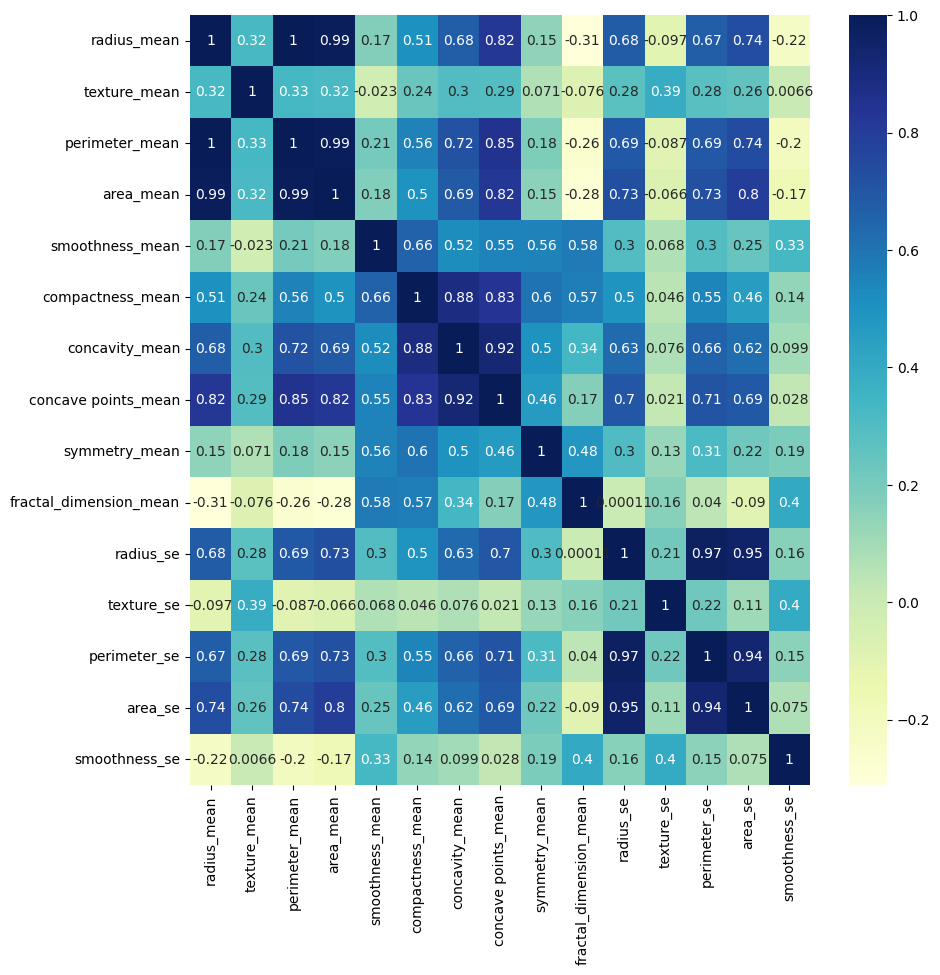

In [104]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.iloc[:, :15].corr(), cmap="YlGnBu", annot=True)

In [114]:
# columns with very strong correlation
data.corr()
corr_features = []
c_f = set()
for col in data.corr().columns:
  for row in data.corr().index:
    corr = data.corr().loc[row, col]
    if corr == 1:
      continue
    if corr > 0.85 or corr < -0.85:
      c_f.add(col)
      corr_features.append((col, row))
print(corr_features)

[('radius_mean', 'perimeter_mean'), ('radius_mean', 'area_mean'), ('radius_mean', 'radius_worst'), ('radius_mean', 'perimeter_worst'), ('radius_mean', 'area_worst'), ('texture_mean', 'texture_worst'), ('perimeter_mean', 'radius_mean'), ('perimeter_mean', 'area_mean'), ('perimeter_mean', 'concave points_mean'), ('perimeter_mean', 'radius_worst'), ('perimeter_mean', 'perimeter_worst'), ('perimeter_mean', 'area_worst'), ('area_mean', 'radius_mean'), ('area_mean', 'perimeter_mean'), ('area_mean', 'radius_worst'), ('area_mean', 'perimeter_worst'), ('area_mean', 'area_worst'), ('compactness_mean', 'concavity_mean'), ('compactness_mean', 'compactness_worst'), ('concavity_mean', 'compactness_mean'), ('concavity_mean', 'concave points_mean'), ('concavity_mean', 'concavity_worst'), ('concavity_mean', 'concave points_worst'), ('concave points_mean', 'perimeter_mean'), ('concave points_mean', 'concavity_mean'), ('concave points_mean', 'perimeter_worst'), ('concave points_mean', 'concave points_wor

<Axes: >

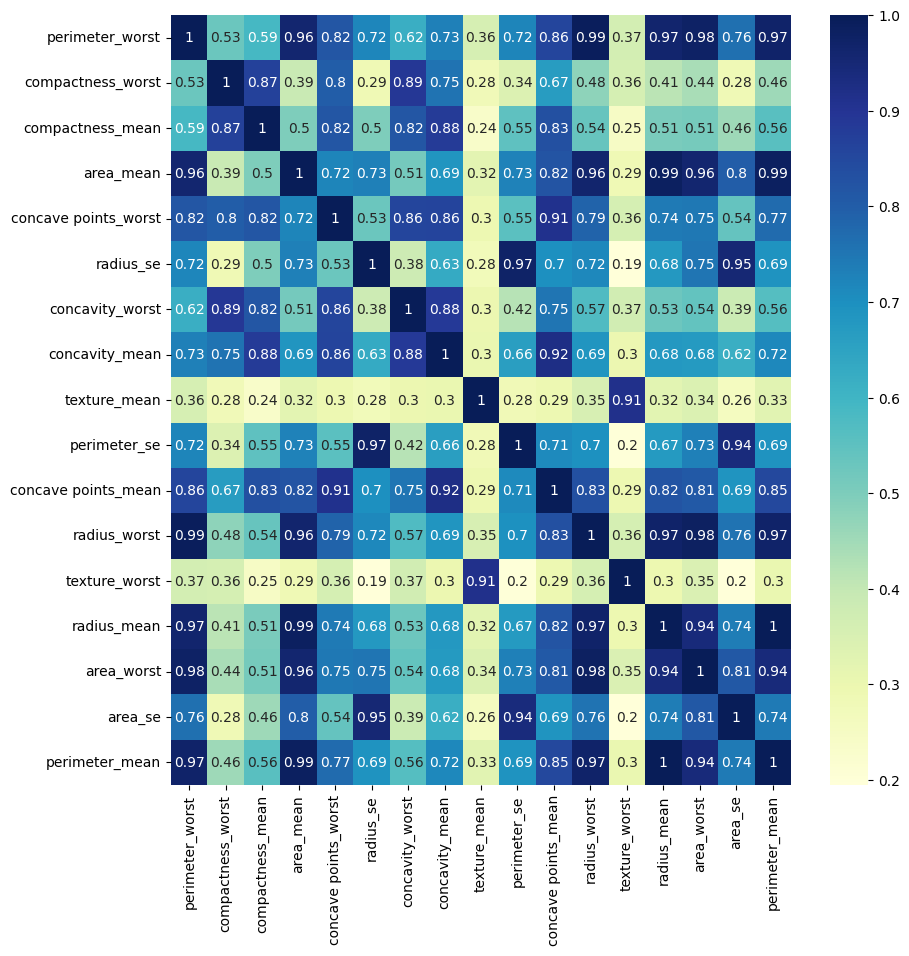

In [118]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data[list(c_f)].corr(), cmap="YlGnBu", annot=True)


Let's not delete all features with 'worst' in description. Some important information might be lost, but radius and perimeter and area are corelated features

In [119]:
scaled_data.drop(['perimeter_mean', 'area_mean'], axis=1, inplace=True)

# Train Test Split

In [123]:
data_train, data_test, y_train, y_test = train_test_split(scaled_data, y, shuffle=True, random_state=16)

# Basic Model, Random Forest



Нужно помнить что Алгоритмы при постоении оптимизируют какую-то свою метрику по дефолту. Например Desition Tree оптимизирует MSE, а нам нужно еще что-то

In [130]:
rf_model = RandomForestClassifier(random_state=21, n_jobs=-1, n_estimators=200)
rf_model.fit(data_train, y_train)

rf_predictions = rf_model.predict(data_test)
train_predictions = rf_model.predict(data_train)

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_train_accuracy = accuracy_score(y_train, train_predictions)

print("Basic Model Train Accuracy is {}".format(rf_train_accuracy))
print("Basic Model Test Accuracy is {}".format(rf_accuracy))


Basic Model Train Accuracy is 1.0
Basic Model Test Accuracy is 0.9790209790209791


In [131]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        91
           1       0.98      0.96      0.97        52

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [127]:
print(classification_report(y_train, train_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       160

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426



# Feature Selection

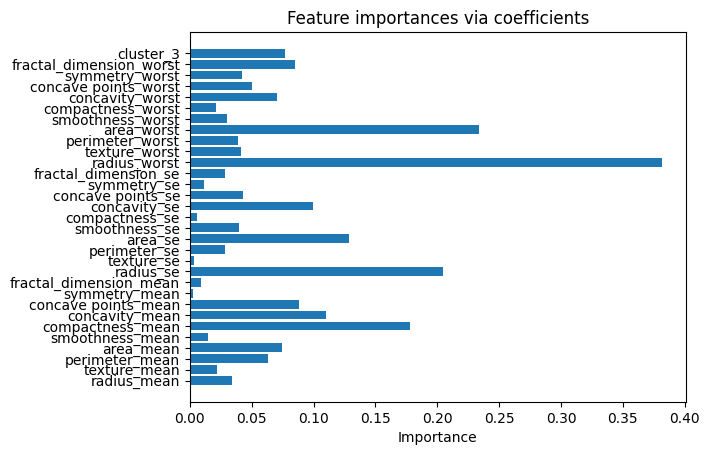

In [97]:
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(scaled_data, y)
importance = np.abs(ridge.coef_)
plt.barh(scaled_data.columns, importance)
plt.title("Feature importances via coefficients")
plt.xlabel("Importance")
plt.show()


# Choose Best Features


In [98]:
'''This function returns array of the most important features'''
def take_best_features(t, features, impor):
  f = []
  assert len(features) == len(impor), 'Incorrect Values'
  for i in range(len(features)):
    if impor[i] > t:
      f.append(features[i])
  return f
t = 0.009


new_features = take_best_features(t, scaled_data.columns, importance)
print(new_features)


['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'smoothness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'cluster_3']


In [132]:
for name, score in zip(data_train.columns, rf_model.feature_importances_):
  print(name, score)

radius_mean 0.07629787809150959
texture_mean 0.019072860211754743
smoothness_mean 0.004682617083174376
compactness_mean 0.008996374132340643
concavity_mean 0.04441634032077451
concave points_mean 0.08299122130984245
symmetry_mean 0.004559177874856885
fractal_dimension_mean 0.004789584285794128
radius_se 0.016560889435534566
texture_se 0.004591773018388596
perimeter_se 0.017989476949449492
area_se 0.03578739505706136
smoothness_se 0.004066831280507498
compactness_se 0.004709079433182651
concavity_se 0.004850939214391472
concave points_se 0.004394629482640635
symmetry_se 0.005094412871729958
fractal_dimension_se 0.0051056989020709315
radius_worst 0.14866932202916291
texture_worst 0.021465944152012202
perimeter_worst 0.15677671010349128
area_worst 0.11017973566622721
smoothness_worst 0.01173230533074775
compactness_worst 0.022488907416349093
concavity_worst 0.0416651082013816
concave points_worst 0.10671343220911116
symmetry_worst 0.00981480184423239
fractal_dimension_worst 0.006234830281

<BarContainer object of 29 artists>

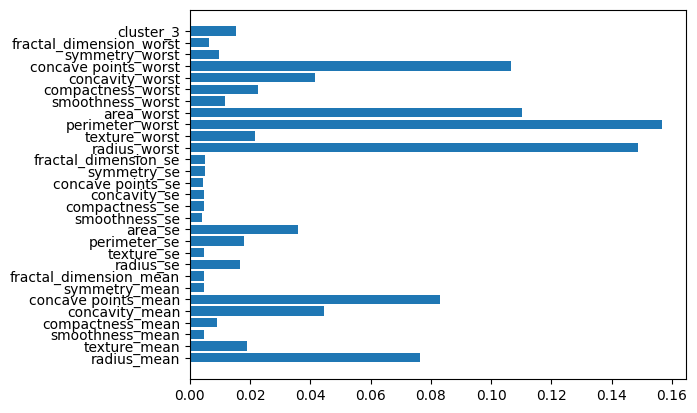

In [134]:
plt.barh(data_train.columns, rf_model.feature_importances_, align='center')

In [159]:
imp_feat = []
for name, score in zip(data_train.columns, rf_model.feature_importances_):
  if score > 0.02:
    imp_feat.append(name)
imp_X = scaled_data[imp_feat]


<Axes: xlabel='concavity_mean', ylabel='Count'>

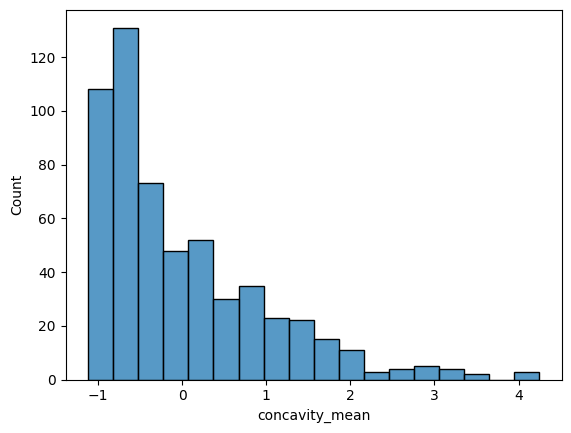

In [142]:
sns.histplot(imp_X.iloc[:, 1])

In [146]:
imp_X.shape

(569, 11)

In [149]:
imp_X.columns[0]

'radius_mean'

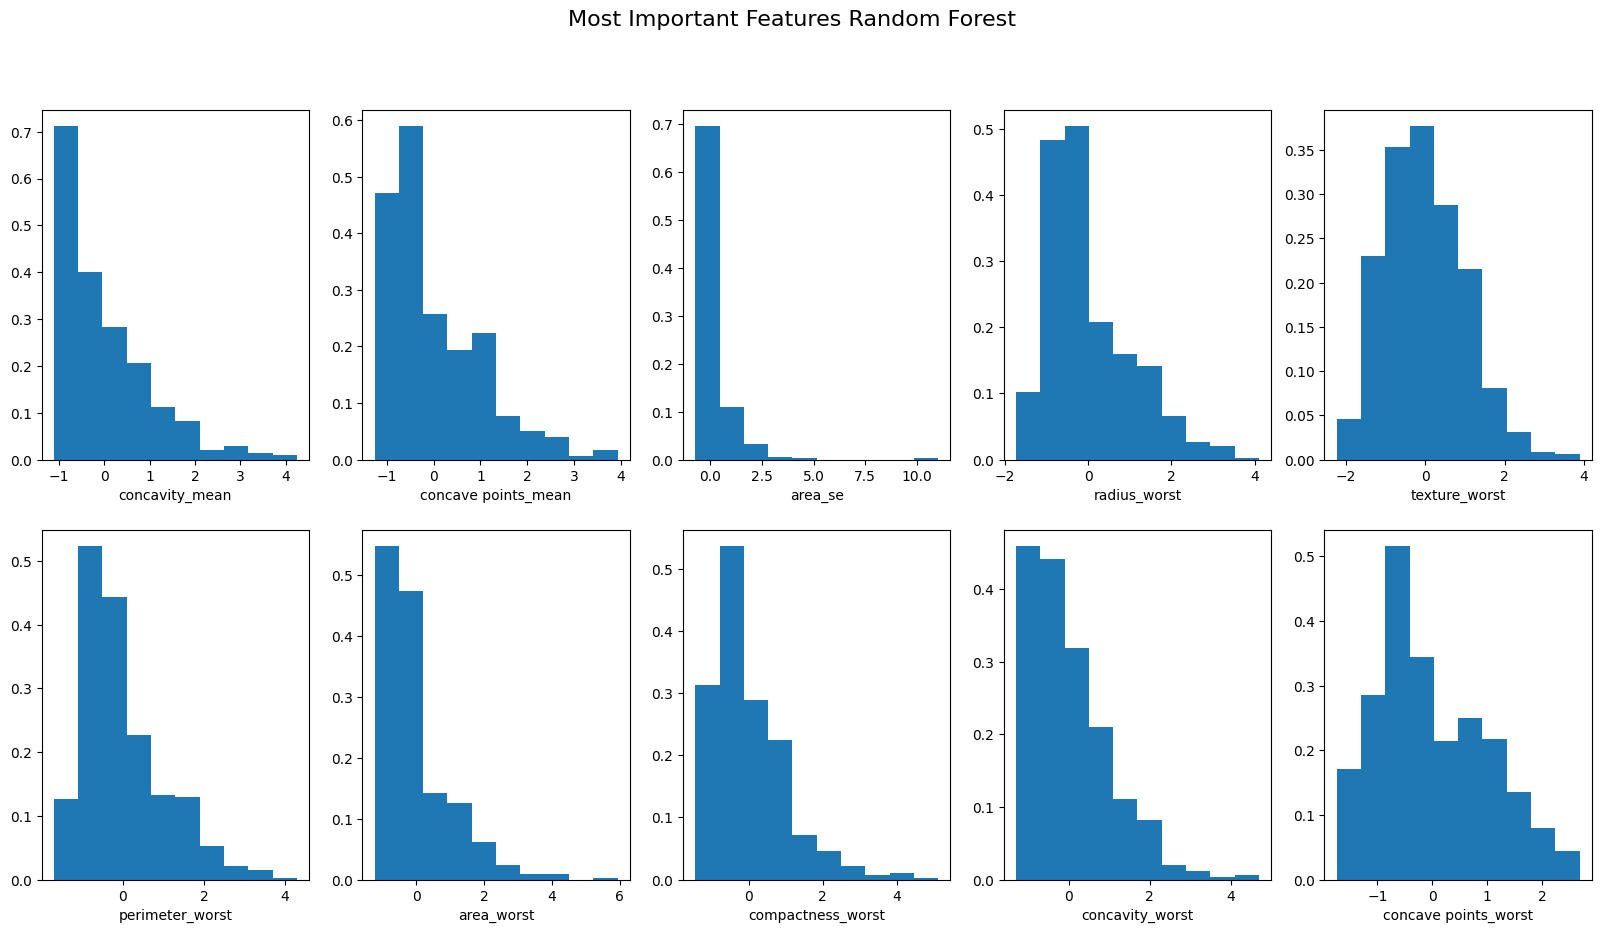

In [156]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
fig.suptitle('Most Important Features Random Forest', fontsize=16)
count = 1
for i in range(2):
    for j in range(5):

        ax = axes[i][j]
        ax.hist(imp_X.iloc[:, count], density=True)
        ax.set_xlabel(imp_X.columns[count])

        count += 1


In [160]:
X_imp_train, X_imp_test, y_imp_train, y_imp_test = train_test_split(imp_X, y, shuffle=True, random_state=16)

In [161]:
rf_model = RandomForestClassifier(random_state=21, n_jobs=-1)
rf_model.fit(X_imp_train, y_imp_train)

rf_imp_predictions = rf_model.predict(X_imp_test)
train_imp_predictions = rf_model.predict(X_imp_train)

rf_imp_accuracy = accuracy_score(y_imp_test, rf_imp_predictions)
rf_imp_train_accuracy = accuracy_score(y_imp_train, train_imp_predictions)

print("Basic Model Train Accuracy is {}".format(rf_imp_train_accuracy))
print("Basic Model Test Accuracy is {}".format(rf_imp_accuracy))

Basic Model Train Accuracy is 1.0
Basic Model Test Accuracy is 0.972027972027972


In [162]:
print(classification_report(y_imp_test, rf_imp_predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        91
           1       0.96      0.96      0.96        52

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [163]:
from sklearn.feature_selection import SelectKBest

selector = SelectKBest()

selector.fit(data_train, y_train)

params = selector.feature_names_in_
X_sk = data_train[params]

X_sk_train, X_sk_test, y_sk_train, y_sk_test = train_test_split(data_train, y_train, random_state=1, test_size=0.2)

In [164]:
rf_model.fit(X_sk_train, y_sk_train)

rf_sk_predictions = rf_model.predict(X_sk_test)
train_sk_predictions = rf_model.predict(X_sk_train)

rf_imp_accuracy = accuracy_score(y_sk_test, rf_sk_predictions)
rf_imp_train_accuracy = accuracy_score(y_sk_train, train_sk_predictions)

print("Basic Model Train Accuracy is {}".format(rf_imp_train_accuracy))
print("Basic Model Test Accuracy is {}".format(rf_imp_accuracy))

Basic Model Train Accuracy is 1.0
Basic Model Test Accuracy is 0.9767441860465116


In [165]:
print(classification_report(y_sk_test, rf_sk_predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        52
           1       1.00      0.94      0.97        34

    accuracy                           0.98        86
   macro avg       0.98      0.97      0.98        86
weighted avg       0.98      0.98      0.98        86



# Base Model: Regression

In [167]:
reg = LogisticRegression()
reg.fit(data_train, y_train)

LogisticRegression()

In [169]:
print(classification_report(reg.predict(data_test), y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        92
           1       0.96      0.98      0.97        51

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



It's very high Recall!

# PCA and Logistic Regression

In [170]:
pca = PCA(n_components=2)
scaler = StandardScaler()
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])
param_grid = {
    "pca__n_components": list(range(2, 15)),
    "logistic__C": np.logspace(-4, 4, 4),}
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(data_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.977):
{'logistic__C': 21.54434690031882, 'pca__n_components': 7}


<Axes: xlabel='1', ylabel='0'>

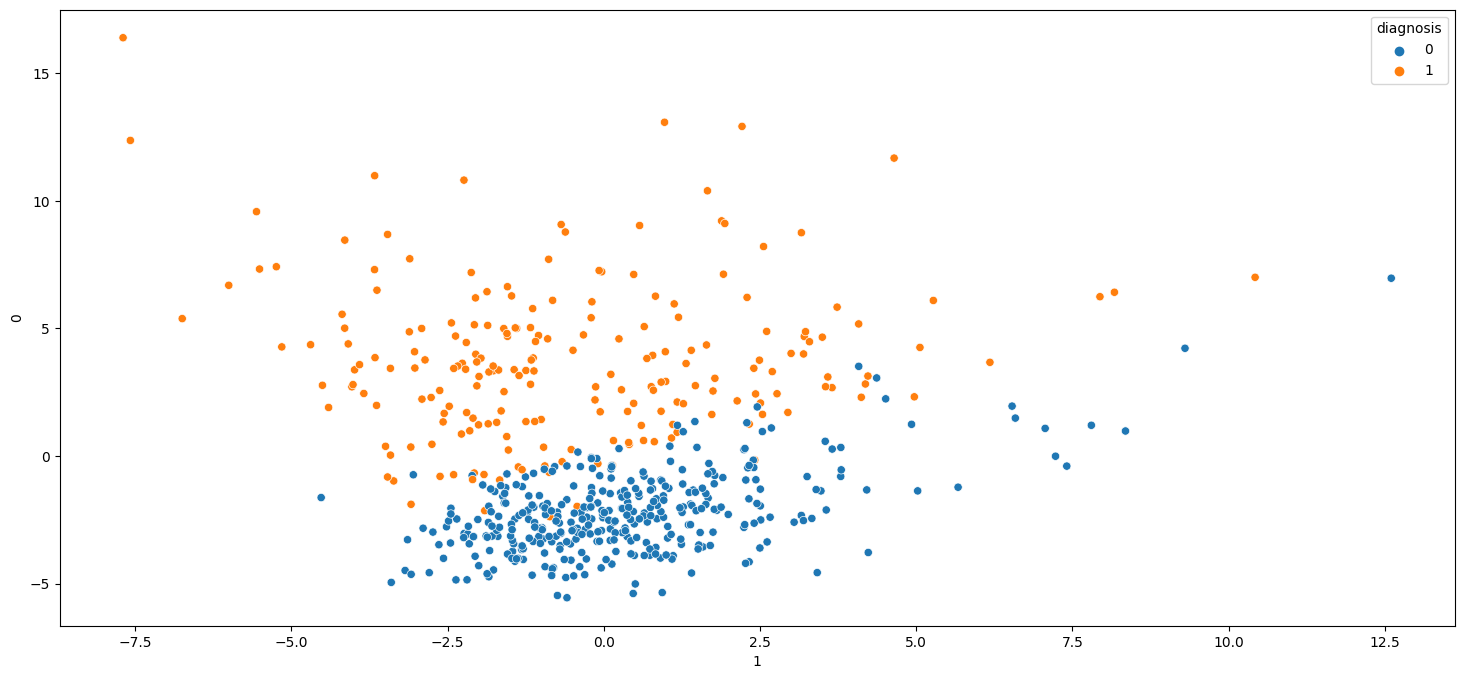

In [172]:
pca = PCA(n_components=search.best_params_['pca__n_components'])
X_p = pca.fit_transform(data_train)
X_p_df = pd.DataFrame(X_p)
plt.figure(figsize=(18, 8))
sns.scatterplot(x=X_pca_df[1], y=X_pca_df[0], hue=y)

In [173]:
logistic = LogisticRegression(max_iter=10000, C=10000)
pca = PCA(n_components=5)
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])
pipe.fit(data_train, y_train)
print(classification_report(pipe.predict(data_test), y_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        89
           1       0.98      0.94      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



Unfirtunatly, the quality of Logistic Regression decreased

# Gradient Boosting

In [231]:
gb_model = GradientBoostingClassifier(random_state=1)

gb_predictions = gb_model.fit(data_train, y_train).predict(data_test)

gb_train_predictions = gb_model.predict(data_train)

print(classification_report(gb_predictions, y_test))



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        89
         1.0       0.96      0.93      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



If train = 1 means overfitting. </n>
To change it cut max_depth or low learning rate

In [232]:
gb_model_low = GradientBoostingClassifier(random_state=0, max_depth=1, learning_rate=0.1)

gb_low_predictions = gb_model_low.fit(data_train, y_train).predict(data_test)

gb_low_train_predictions = gb_model_low.predict(data_train)

print(classification_report(gb_low_predictions, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        89
         1.0       0.96      0.93      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



In [233]:
gb_impot_features = gb_model_low.feature_importances_

In [234]:
for name, score in zip(features, gb_model.feature_importances_):
  print(name, score)

radius_mean 0.004361068642990704
texture_mean 0.016138250447546625
perimeter_mean 0.0006822504049837128
area_mean 0.0003717235551427719
smoothness_mean 0.0012610773980269868
compactness_mean 0.018725836691408034
concavity_mean 0.0021877802071051423
concave points_mean 0.00024583910497874713
symmetry_mean 0.006794003258684489
fractal_dimension_mean 3.6218171653335214e-05
radius_se 0.0007275727811833437
texture_se 0.00597944850936413
perimeter_se 0.0008572204132583526
area_se 0.0015912938871037177
smoothness_se 0.0029178977853717932
compactness_se 0.0010735757059112305
concavity_se 0.002057288050527986
concave points_se 0.0018324339196286088
symmetry_se 0.11855557462813474
fractal_dimension_se 0.0705832726539711
radius_worst 0.47804477417561975
texture_worst 0.17531616972657602
perimeter_worst 0.00721111783214976
area_worst 0.0028727047058588703
smoothness_worst 0.00285763672828015
compactness_worst 0.07329225617259322
concavity_worst 0.0019045609092645452
concave points_worst 0.00152115

<BarContainer object of 29 artists>

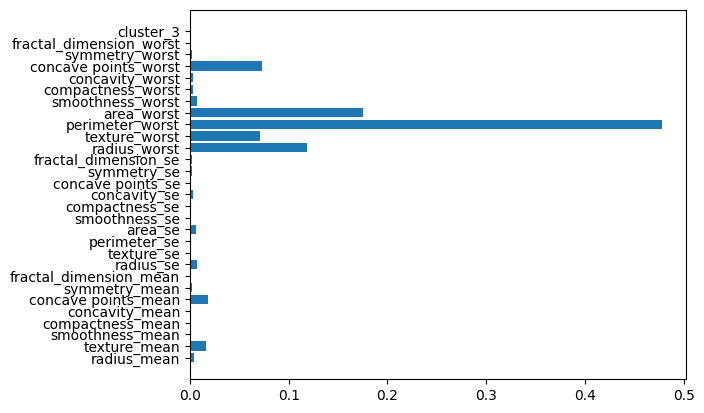

In [235]:
plt.barh(data_train.columns, gb_model.feature_importances_, align='center')

# XGBoost

In [237]:
train, test, y_train, y_test = train_test_split(data, y, shuffle=True, random_state=16)

In [240]:
xg_model = XGBClassifier(max_depth=5, random_state=1, eval_metric='map')
xg_model.fit(train, y_train)

xg_predictions = xg_model.predict(test)

xg_predictions_train = xg_model.predict(train)

print(classification_report(xg_predictions, y_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        89
           1       0.96      0.93      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



In [242]:
grid = {'learning_rate': [0.01, 0.05, 0.1],
       'max_depth': [4, 5, 6, 7],
       'n_estimators': [2000, 5000, 10000],
       'reg_lambda': [0.1, 0.5, 1, 4]
       }
grid_search_xgb = GridSearchCV(xg_model, grid, scoring='neg_mean_absolute_error')
grid_search_xgb.fit(train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='map', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_...
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=1, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [4, 5, 6, 7],
                         'n_estimators': [2000, 5000, 10000],
                         'reg_lambda': [0.1, 0.5, 1, 4]},
             scoring='neg_mean_absolute_error')

In [182]:
"""Train model Only with Important features"""
xg_model.fit(X_imp_train, y_train)

xg_imp_predictions = xg_model.predict(X_imp_test)
xg_train_imp_predictions = xg_model.predict(X_imp_train)

xg_imp_accuracy = accuracy_score(y_test, xg_imp_predictions)
xg_imp_train_accuracy = accuracy_score(y_train, xg_train_imp_predictions)

print("Basic Model Train Accuracy is {}".format(xg_imp_train_accuracy))
print("Basic Model Test Accuracy is {}".format(xg_imp_accuracy))

Basic Model Train Accuracy is 1.0
Basic Model Test Accuracy is 0.965034965034965


In [183]:
"""Log all features so their distribution be more GAUSS"""

X_train_log = np.log1p(data_train)
X_test_log = np.log1p(data_test)

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


In [184]:
"""Train Model with log features"""
xg_model = XGBClassifier(max_depth=2, random_state=32)
xg_model.fit(X_train_log, y_train)

xg_log_predictions = xg_model.predict(X_test_log)

xg_log_predictions_train = xg_model.predict(X_train_log)


print("Accuracy for Train using Low Gradient Boosting is " + str(accuracy_score(y_train, xg_log_predictions_train)))

print("Accuracy for Test using Low Gradient Boosting is " + str(accuracy_score(y_test, xg_log_predictions)))



Accuracy for Train using Low Gradient Boosting is 1.0
Accuracy for Test using Low Gradient Boosting is 0.951048951048951


# Logistic Regression with PyTorch

In [191]:
import torch
import torch.nn as nn

In [192]:
y_train_lr = np.array(y_train)
y_test_lr = np.array(y_test)

In [193]:
n_samples, n_features = data_train.shape

X_train = torch.from_numpy(data_train.values.astype(np.float32))
X_test = torch.from_numpy(data_test.values.astype(np.float32))
y_train = torch.from_numpy(y_train_lr.astype(np.float32)).view(-1, 1)
y_test = torch.from_numpy(y_test_lr.astype(np.float32)).view(-1, 1)

# y_train, y_test = y_train.view(y_train.shape[0], 1), y_test.view(y_test.shape[0], 1)
y_train.shape

torch.Size([426, 1])

In [209]:
# 1) Model
# Linear model f = wx + b , sigmoid at the end
class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model(n_features)

# 2) Loss and optimizer
num_epochs = 2001
learning_rate = 0.001
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
for epoch in range(num_epochs):
    # Forward pass and loss
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 100 == 0:
      print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 100, loss = 0.4744
epoch: 200, loss = 0.4244
epoch: 300, loss = 0.3868
epoch: 400, loss = 0.3573
epoch: 500, loss = 0.3335
epoch: 600, loss = 0.3140
epoch: 700, loss = 0.2975
epoch: 800, loss = 0.2835
epoch: 900, loss = 0.2713
epoch: 1000, loss = 0.2607
epoch: 1100, loss = 0.2513
epoch: 1200, loss = 0.2429
epoch: 1300, loss = 0.2354
epoch: 1400, loss = 0.2286
epoch: 1500, loss = 0.2225
epoch: 1600, loss = 0.2168
epoch: 1700, loss = 0.2117
epoch: 1800, loss = 0.2069
epoch: 1900, loss = 0.2025
epoch: 2000, loss = 0.1984


In [229]:
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy: {acc.item():.4f}')

accuracy: 0.9860


In [230]:
print(classification_report(y_predicted_cls, y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        91
         1.0       0.98      0.98      0.98        52

    accuracy                           0.99       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.99      0.99      0.99       143

